## Cost function and Gradient descent
Understanding cost functions and gradient descent using a simple Linear regression model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
n = 200 # number of observations
bias = 4
slope = 3.5

In [3]:
x = np.random.normal(0, 2, n)
x_b = np.column_stack((x, np.ones(n)))
y = bias + slope*x + np.random.normal(0, 1, n)
df = pd.DataFrame({'x':x, 'y':y})

In [4]:
learning_rate = 0.05
n_iterations = 100
theta = np.array([20, 20])

In [5]:
b0 = np.zeros(n_iterations)
b1 = np.zeros(n_iterations)
sse_i = np.zeros(n_iterations)
for iteration in range(n_iterations): 
    yhat = x_b.dot(theta) # predict using weights in theta
    residuals_b = yhat - y # calculate the residuals
    gradients = 2/n * x_b.T.dot(residuals_b) # calculate the gradients of MSE w.r.t model weights 
    theta = theta - learning_rate * gradients # update theta 

    sse_i[iteration] = np.sum((y - x_b.dot(theta))**2)
    b0[iteration] = theta[1]
    b1[iteration] = theta[0]

In [6]:
model_i = pd.DataFrame({'model_iter':np.arange(1, n_iterations+1), 
                       'sse':sse_i, 
                       'b0':b0, 
                       'b1':b1})

In [11]:
model_i

,model_iter,sse,b0,b1
0,1,121787.234032,18.193009,13.144496
1,2,60393.328169,16.655365,9.080298
2,3,35383.077458,15.324040,6.676921
3,4,23893.148589,14.156925,5.261134
4,5,17695.209816,13.124829,4.432069
...,...,...,...,...
95,96,181.908248,4.060326,3.531100
96,97,181.908232,4.060261,3.531103
97,98,181.908219,4.060202,3.531105
98,99,181.908209,4.060150,3.531107


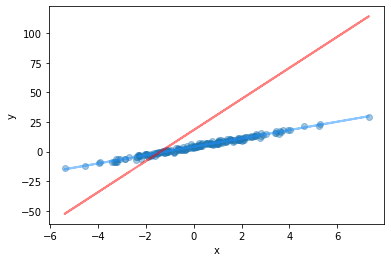

In [7]:
plt.scatter(df.x, df.y, alpha=0.4)
plt.plot(df.x, b0[-1] + b1[-1]*df.x, color='dodgerblue', alpha=0.5, linewidth=2)
plt.plot(df.x, b0[0] + b1[0]*df.x, color='red', alpha=0.5, linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

After the model learns:

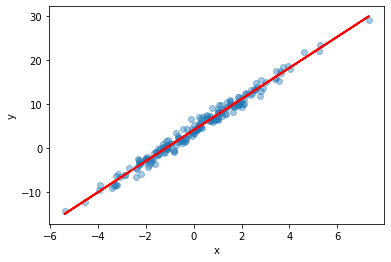

In [14]:
plt.scatter(df.x, df.y, alpha=0.4)
plt.plot(df.x, theta[1] + theta[0]*df.x, color='red', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

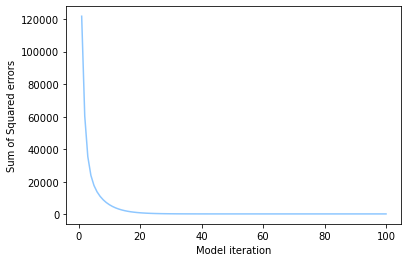

In [8]:
plt.plot(model_i.model_iter, model_i.sse, color='dodgerblue', alpha=0.5)
plt.xlabel('Model iteration')
plt.ylabel('Sum of Squared errors')
plt.show()

In [9]:
def predict_from_theta(x):
    x_b = np.column_stack((x, np.ones(len(x))))
    return x_b.dot(theta)

In [10]:
print(predict_from_theta(np.random.normal(0, 1, 10)))

[ 1.33657774 -2.14898848 -0.777693   10.37481217  0.57224831  9.50238521
  1.02686542  4.44447135  6.23726079  0.7112235 ]
